In [1]:
import json
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [8]:
filename = "rainfall09.csv"
df = pd.read_csv(filename,encoding="SHIFT-JIS",skiprows=4)
df.head()

,Unnamed: 0,Unnamed: 1,現象なし情報,品質情報,均質番号,Unnamed: 5,現象なし情報.1,品質情報.1,均質番号.1
0,2017/9/1 1:00:00,0.0,1,8,1,0.0,1,8,1
1,2017/9/1 2:00:00,0.0,1,8,1,0.0,1,8,1
2,2017/9/1 3:00:00,0.0,1,8,1,0.0,1,8,1
3,2017/9/1 4:00:00,0.0,1,8,1,0.0,1,8,1
4,2017/9/1 5:00:00,0.0,1,8,1,0.0,1,8,1


In [9]:
df_rain = df.iloc[:,0:2]
df_rain.columns = ["datetime", "rain"]
df_rain.head()

,datetime,rain
0,2017/9/1 1:00:00,0.0
1,2017/9/1 2:00:00,0.0
2,2017/9/1 3:00:00,0.0
3,2017/9/1 4:00:00,0.0
4,2017/9/1 5:00:00,0.0


In [10]:
df_rain["datetime"] = df_rain.datetime.map(lambda _: pd.to_datetime(_))
df_rain.head()

,datetime,rain
0,2017-09-01 01:00:00,0.0
1,2017-09-01 02:00:00,0.0
2,2017-09-01 03:00:00,0.0
3,2017-09-01 04:00:00,0.0
4,2017-09-01 05:00:00,0.0


In [11]:
df_rain = df_rain.set_index('datetime')
df_rain.index = df_rain.index.tz_localize('UTC')
df_rain.index = df_rain.index.tz_convert('Asia/Tokyo')
df_rain.index = df_rain.index.tz_localize(None)
df_rain.head()

,rain
datetime,
2017-09-01 10:00:00,0.0
2017-09-01 11:00:00,0.0
2017-09-01 12:00:00,0.0
2017-09-01 13:00:00,0.0
2017-09-01 14:00:00,0.0


In [12]:
df_rain.tail()

,rain
datetime,
2017-10-01 05:00:00,0.0
2017-10-01 06:00:00,0.0
2017-10-01 07:00:00,0.0
2017-10-01 08:00:00,0.0
2017-10-01 09:00:00,0.0


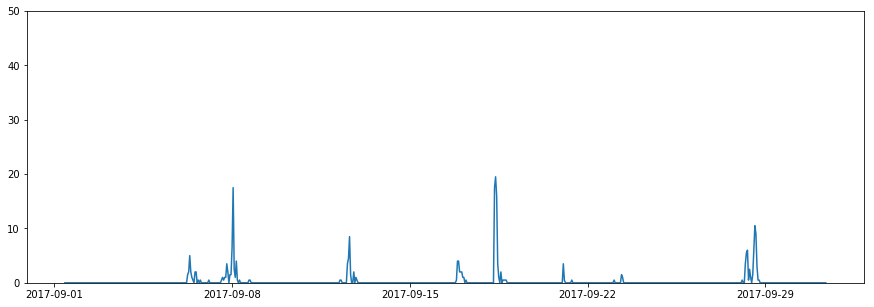

In [13]:
plt.figure(figsize=(15,5))
plt.ylim(0,50)
plt.plot(df_rain.rain)